<a href="https://colab.research.google.com/github/Narachii/tensorflow_basics/blob/CNN_Practice/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)

170500096/170498071 [==============================] - 13s 0us/step
x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [5]:
K = len(set(y_train))
print('number of classes', K)

number of classes 10


In [0]:
i = Input(shape=x_train[0].shape)
## Simple model
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
# x = GlobalMaxPooling2D()(x)
# x = Flatten()(x)
# x = Dropout(0.5)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(K, activation='softmax')(x)

x = Conv2D(32, (3, 3),activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3),activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x) # down sizing
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3),activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3),activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x) # down sizing
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3),activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3),activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x) # down sizing
# x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4946 - accuracy: 0.5076 - val_loss: 1.2523 - val_accuracy: 0.5584
Epoch 2/50
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0597 - accuracy: 0.6321 - val_loss: 1.2018 - val_accuracy: 0.5901
Epoch 3/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8588 - accuracy: 0.7039 - val_loss: 1.1774 - val_accuracy: 0.6196
Epoch 4/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6550 - accuracy: 0.7761 - val_loss: 1.1845 - val_accuracy: 0.6454
Epoch 5/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5101 - accuracy: 0.8274 - val_loss: 1.3158 - val_accuracy: 0.6340
Epoch 6/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.4071 - accuracy: 0.8638 - val_loss: 1.3872 - val_accuracy: 0.6091
Epoch 7/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.3345 - accuracy: 0.8883 - val_loss: 1.7027 -

In [15]:
# Fit with data augmentation
model = Model(i, x)
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.6085 - accuracy: 0.4921 - val_loss: 1.2182 - val_accuracy: 0.5968
Epoch 2/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.2838 - accuracy: 0.5663 - val_loss: 1.0764 - val_accuracy: 0.6370
Epoch 3/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.1640 - accuracy: 0.6047 - val_loss: 1.0472 - val_accuracy: 0.6499
Epoch 4/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.1054 - accuracy: 0.6238 - val_loss: 1.0405 - val_accuracy: 0.6552
Epoch 5/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.0644 - accuracy: 0.6344 - val_loss: 0.9568 - val_accuracy: 0.6774
Epoch 6/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.0358 - accuracy: 0.6462 - val_loss: 0.9943 - val_accuracy: 0.6614
Epoch 7/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.0097 - accuracy: 0.6544 - val_loss: 0.9630 -

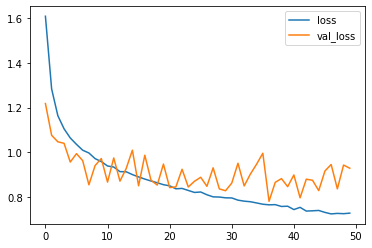

In [16]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

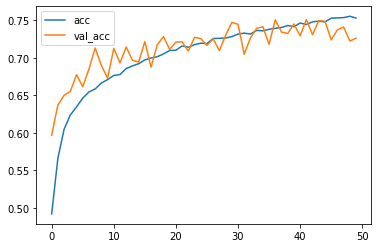

In [17]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[811  11  48  20  24   8  28  10  20  20]
 [  8 867  12   9   4   5  27   6  12  50]
 [ 50   3 604  53  63  67 140  16   0   4]
 [ 17   7  58 530  44 151 162  20   5   6]
 [  8   1  65  40 646  35 169  31   4   1]
 [ 12   1  45 168  41 621  85  24   1   2]
 [  4   2  30  26   7   8 922   1   0   0]
 [ 15   2  32  36  54  60  35 760   1   5]
 [118  33  18  26  10  10  21   1 737  26]
 [ 36  91   8  25   6  19  23  20  11 761]]


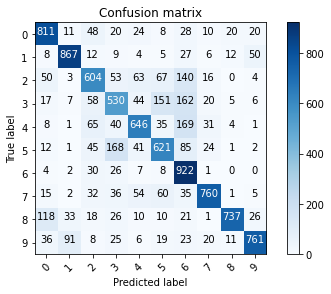

In [18]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

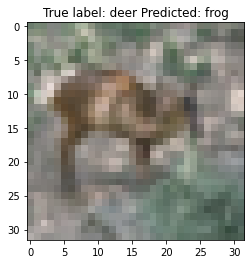

In [20]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [21]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              3355